<a href="https://colab.research.google.com/github/elder-rjvp/python/blob/main/C%C3%B3pia_de_Sistema_recomenda%C3%A7%C3%A3o_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎯 Projeto: Sistema de Recomendação por Similaridade de Imagens no Colab 🖼️🤝

##🔍 Objetivo

Criar um sistema de recomendação simples e eficiente que funcione diretamente no Google Colab. O sistema recomendará imagens de produtos similares com base na aparência visual, considerando características como formato, cor e textura. Ideal para e-commerce e outros cenários! 🛒👕👞

### 🏁 Resumo do Projeto

- **Dataset:** Fashion MNIST 🎨  
- **Modelo:** Utilizamos MobileNetV2 pré-treinado para extrair características visuais 💡.  
- **Similaridade:** Calculamos similaridades usando Cosine Similarity 🔗.  
- **Visualização:** Recomendação de itens visualizada diretamente no Colab com Matplotlib 🖼️.  
- **Testes:** Permite testar com imagens customizadas 📥.  

#### 🛠️ Bibliotecas Usadas
- TensorFlow  
- Matplotlib  
- NumPy  

#### ⚡ Vantagens
- Projeto rápido e leve.  
- Funciona diretamente no Colab!  

Se precisar de mais detalhes ou ajuda para ajustar, é só avisar! 🚀😊

##🛠️ Passo a Passo para Construção do Projeto
###1️⃣ Configurando o Ambiente

📌 Primeiro, instalamos as bibliotecas essenciais no Colab para manter o projeto leve e rápido:

In [ ]:
#!pip install tensorflow matplotlib numpy

###2️⃣ Selecionando o Dataset

💾 Para simplificar, utilizaremos o dataset Fashion MNIST, embutido no TensorFlow. Ele contém 10 categorias de produtos (como camisetas, sapatos, bolsas) em imagens de baixa resolução.

🏷️ Categorias disponíveis:

0: T-shirt/top 👕

1: Trouser 👖

2: Pullover 🧥

3: Dress 👗

4: Coat 🧥

5: Sandal 🩴

6: Shirt 👔

7: Sneaker 👟

8: Bag 👜

9: Ankle boot 👢

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3️⃣ Criando o Modelo de Deep Learning

💡 Usaremos o modelo pré-treinado MobileNetV2 para extrair embeddings (representações matemáticas das imagens) e identificar similaridades.

📋 Passos:

Adicione camadas extras para simplificar a saída.
Use o modelo como "feature extractor" (extrator de características).

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Carregando o MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Adicionando camada de pooling global
model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

<ipython-input-3-e92aaee30fe8>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


###4️⃣ Processando as Imagens 🖌️

🎨 Precisamos redimensionar e normalizar as imagens para que sejam compatíveis com o modelo:

In [ ]:

import numpy as np
from tensorflow.image import resize

def preprocess_images(images):
    # Add a channel dimension using np.expand_dims
    images = np.expand_dims(images, axis=-1)
    images = np.array([resize(img, (32, 32)).numpy() for img in images])  # Redimensiona para 128x128
    return np.repeat(images, 3, axis=-1) / 255.0  # Normaliza e converte para 3 canais

x_train_processed = preprocess_images(x_train)
x_test_processed = preprocess_images(x_test)

###5️⃣ Gerando Embeddings 🔢

📌 Usaremos o modelo para transformar as imagens em embeddings, que são representações matemáticas no espaço latente.

In [ ]:
train_embeddings = model.predict(x_train_processed)
test_embeddings = model.predict(x_test_processed)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step


###6️⃣ Calculando Similaridade 🧮

🔍 Para recomendar imagens, utilizamos a distância de similaridade coseno entre os embeddings.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_images(query_embedding, embeddings, k=5):
    similarities = cosine_similarity([query_embedding], embeddings)  # Calcula similaridade
    indices = np.argsort(similarities[0])[::-1][:k]  # Ordena por similaridade
    return indices

###7️⃣ Visualizando Recomendações 🖼️✨

📸 Mostramos as imagens similares ao usuário diretamente no Colab usando Matplotlib.

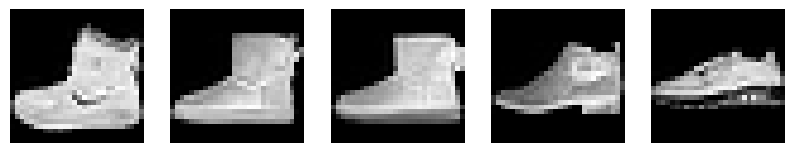

In [ ]:
import matplotlib.pyplot as plt

def plot_images(indices, images):
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(images[idx].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

# Testando com uma imagem de exemplo
query_index = 0  # Índice da imagem de consulta
similar_indices = get_similar_images(train_embeddings[query_index], train_embeddings)
plot_images(similar_indices, x_train)

###8️⃣ Teste com Imagens Customizadas 📥

🔄 Permita que o usuário faça upload de uma imagem para testar recomendações:

Saving download.webp to download.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


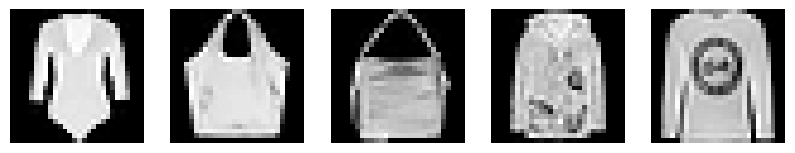

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()
for filename in uploaded.keys():
    img = image.load_img(filename, target_size=(128, 128))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    query_embedding = model.predict(img_array)
    similar_indices = get_similar_images(query_embedding[0], train_embeddings)
    plot_images(similar_indices, x_train)